In [42]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from torch import from_numpy
import torch

x,y = sklearn.datasets.make_circles(10000,random_state=42,noise=0.01)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,random_state=42)
x_train= from_numpy(x_train).type(torch.float)
y_train = from_numpy(y_train).type(torch.float).unsqueeze(1)
x_test = from_numpy(x_test).type(torch.float)
y_test = from_numpy(y_test).type(torch.float).unsqueeze(1)
len(x_train), len(y_train), len(x_test), len(y_test)
x,y

(array([[ 0.01414932,  0.80825776],
        [ 0.94981272, -0.40227928],
        [-0.57336373,  0.81338884],
        ...,
        [ 0.69904136,  0.37536862],
        [ 0.47193707,  0.88316747],
        [-0.73601495,  0.23899316]], shape=(10000, 2)),
 array([1, 0, 0, ..., 1, 0, 1], shape=(10000,)))

(torch.Size([2000, 2]), torch.Size([2000, 1]))

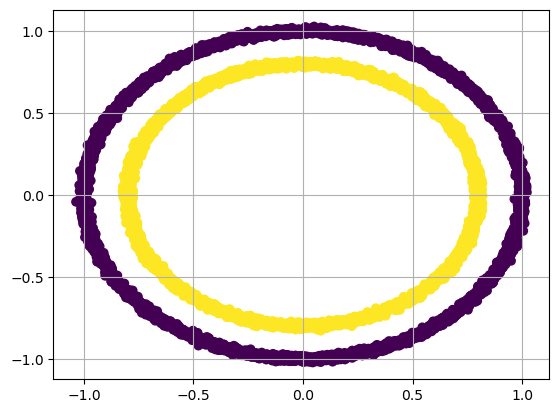

In [43]:
from matplotlib import pyplot as plt


plt.scatter(x[:, 0], x[:, 1], c=y)
plt.grid(True)
x_train.shape, y_train.shape

In [44]:
import torch


class CicleDetectionModel(torch.nn.Module):
	def __init__(self):
		super().__init__()
		self.layer1 = torch.nn.Linear(2,8)
		self.layer2 = torch.nn.Linear(8,4)
		self.layer3 = torch.nn.Linear(4,1)
		self.relu = torch.nn.ReLU()
	def forward(self, x) -> torch.Tensor:
		z = self.layer1(x)
		z = self.relu(z)
		z = self.layer2(z)
		z = self.relu(z)
		z = self.layer3(z)
		return z

In [45]:
torch.manual_seed(42)
mdl = CicleDetectionModel()

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(mdl.parameters(),0.1)

def accuracy_fn(preds, y):
	sum = torch.eq(preds, y).sum()
	acc = (sum/len(y))*100
	return acc
mdl

CicleDetectionModel(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=4, bias=True)
  (layer3): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
)

In [46]:
epochs = 1600
for epoch in range(epochs):
	mdl.train()

	logits = mdl(x_train)
	preds = torch.round(torch.sigmoid(logits))

	loss = loss_fn(logits, y_train)

	optimizer.zero_grad()

	loss.backward()

	optimizer.step()

	mdl.eval()

	with torch.inference_mode():
		test_logits = mdl(x_test)
		test_preds = torch.round(torch.sigmoid(test_logits))

		test_loss = loss_fn(test_logits, y_test)
		test_accuracy = accuracy_fn(test_preds, y_test)

	if epoch%100==0:
		print(f"epoch:{epoch}\tacc:{test_accuracy}% loss:{test_loss}")

epoch:0	acc:49.337501525878906% loss:0.6941713094711304
epoch:100	acc:56.19999694824219% loss:0.6913549304008484
epoch:200	acc:54.82500076293945% loss:0.6898667812347412
epoch:300	acc:55.41250228881836% loss:0.687876284122467
epoch:400	acc:59.10000228881836% loss:0.6850576400756836
epoch:500	acc:61.25% loss:0.6808189749717712
epoch:600	acc:63.51249694824219% loss:0.6743631362915039
epoch:700	acc:65.30000305175781% loss:0.6650111079216003
epoch:800	acc:62.05000305175781% loss:0.653101921081543
epoch:900	acc:63.28750228881836% loss:0.6401337385177612
epoch:1000	acc:66.7874984741211% loss:0.6216535568237305
epoch:1100	acc:72.29999542236328% loss:0.596521258354187
epoch:1200	acc:77.58749389648438% loss:0.5648593902587891
epoch:1300	acc:78.51250457763672% loss:0.5311248302459717
epoch:1400	acc:79.2125015258789% loss:0.501618504524231
epoch:1500	acc:80.54999542236328% loss:0.47237569093704224
